In [1]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
import pandas as pd


In [2]:
# get the cache folder in the upper directory in 2023 folder
ff1.Cache.enable_cache('../cache')


In [3]:
YEAR = 2023
RACE = 'Bahrain'
SESSION = 'FP1'

session = ff1.get_session(
    YEAR, RACE, SESSION
)


In [ ]:
session.load()


In [5]:
PEREZ, ALONSO, NORRIS, CHARLES = 'PER', 'ALO', 'NOR', 'LEC'
laps = session.laps


In [ ]:
PEREZ_LAPS = laps.pick_driver(PEREZ)
ALONSO_LAPS = laps.pick_driver(ALONSO)
NORRIS_LAPS = laps.pick_driver(NORRIS)
CHARLES_LAPS = laps.pick_driver(CHARLES)

PEREZ_FASTEST = PEREZ_LAPS.pick_fastest()
ALONSO_FASTEST = ALONSO_LAPS.pick_fastest()
NORRIS_FASTEST = NORRIS_LAPS.pick_fastest()
CHARLES_FASTEST = CHARLES_LAPS.pick_fastest()

PEREZ_CAR_DATA = PEREZ_FASTEST.get_car_data()
ALONSO_CAR_DATA = ALONSO_FASTEST.get_car_data()
NORRIS_CAR_DATA = NORRIS_FASTEST.get_car_data()
CHARLES_CAR_DATA = CHARLES_FASTEST.get_car_data()

PEREZ_TELEMETRY = PEREZ_FASTEST.get_telemetry()
ALONSO_TELEMETRY = ALONSO_FASTEST.get_telemetry()
NORRIS_TELEMETRY = NORRIS_FASTEST.get_telemetry()
CHARLES_TELEMETRY = CHARLES_FASTEST.get_telemetry()


In [ ]:
delta_time_1, ref_tel_1, compare_tel_1 = utils.delta_time(
    PEREZ_FASTEST, ALONSO_FASTEST)

delta_time_2, ref_tel_2, compare_tel_2 = utils.delta_time(
    CHARLES_FASTEST, NORRIS_FASTEST)


In [10]:
PEREZ_DVR = PEREZ_FASTEST['Team']
ALONSO_DVR = ALONSO_FASTEST['Team']
NORRIS_DVR = NORRIS_FASTEST['Team']
CHARLES_DVR = CHARLES_FASTEST['Team']


In [23]:
plot_size = [15, 15]
plot_title = f"{session.event.year} {session.event.EventName} - {session.name}"
plot_ratios = [2, 2, 3, 2, 1, 1, 2, 1]
plot_filename = plot_title.replace(" ", "") + ".png"


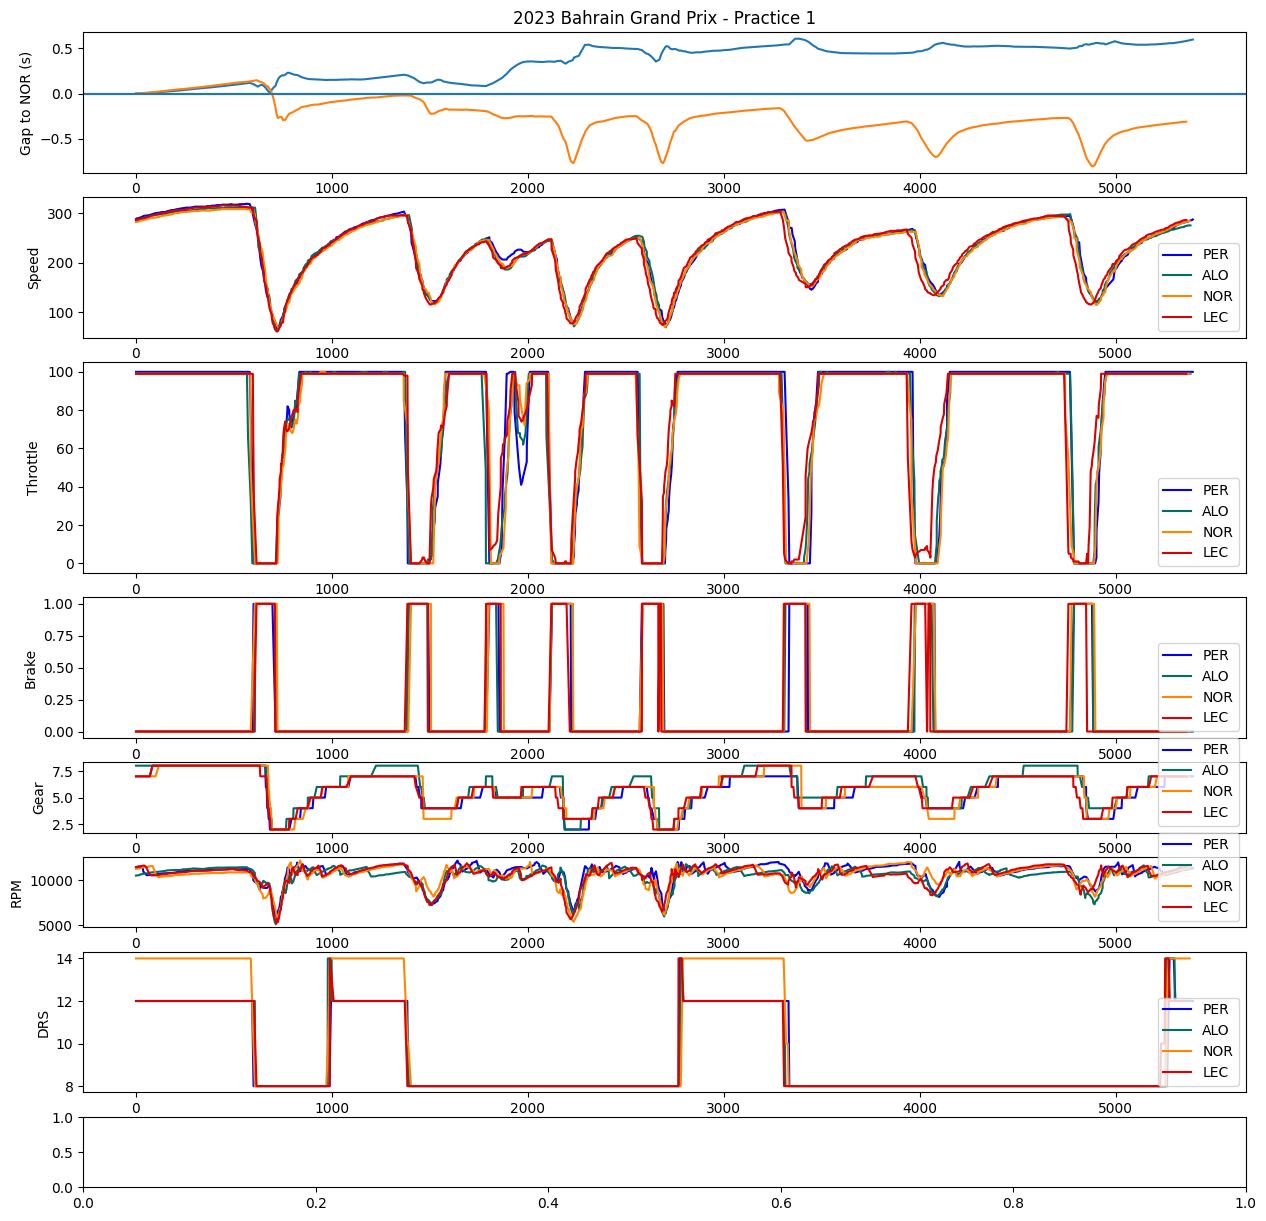

In [26]:
plt.rcParams['figure.figsize'] = plot_size

fig, ax = plt.subplots(8, 1, gridspec_kw={'height_ratios': plot_ratios})

ax[0].title.set_text(plot_title)

ax[0].plot(ref_tel_1['Distance'], delta_time_1)
ax[0].axhline(0)
ax[0].set(ylabel=f"Gap to {ALONSO} (s)")

ax[0].plot(ref_tel_2['Distance'], delta_time_2)
ax[0].axhline(0)
ax[0].set(ylabel=f"Gap to {NORRIS} (s)")

ax[1].plot(PEREZ_TELEMETRY['Distance'], PEREZ_TELEMETRY['Speed'],
           label=PEREZ, color=ff1.plotting.team_color(PEREZ_DVR))
ax[1].plot(ALONSO_TELEMETRY['Distance'], ALONSO_TELEMETRY['Speed'],
           label=ALONSO, color=ff1.plotting.team_color(ALONSO_DVR))
ax[1].plot(NORRIS_TELEMETRY['Distance'], NORRIS_TELEMETRY['Speed'],
           label=NORRIS, color=ff1.plotting.team_color(NORRIS_DVR))
ax[1].plot(CHARLES_TELEMETRY['Distance'], CHARLES_TELEMETRY['Speed'],
           label=CHARLES, color=ff1.plotting.team_color(CHARLES_DVR))
ax[1].set(ylabel='Speed')
ax[1].legend(loc="lower right")

ax[2].plot(PEREZ_TELEMETRY['Distance'], PEREZ_TELEMETRY['Throttle'],
              label=PEREZ, color=ff1.plotting.team_color(PEREZ_DVR))
ax[2].plot(ALONSO_TELEMETRY['Distance'], ALONSO_TELEMETRY['Throttle'],
                label=ALONSO, color=ff1.plotting.team_color(ALONSO_DVR))
ax[2].plot(NORRIS_TELEMETRY['Distance'], NORRIS_TELEMETRY['Throttle'],
                label=NORRIS, color=ff1.plotting.team_color(NORRIS_DVR))
ax[2].plot(CHARLES_TELEMETRY['Distance'], CHARLES_TELEMETRY['Throttle'],
                label=CHARLES, color=ff1.plotting.team_color(CHARLES_DVR))
ax[2].set(ylabel='Throttle')
ax[2].legend(loc="lower right")

ax[3].plot(PEREZ_TELEMETRY['Distance'], PEREZ_TELEMETRY['Brake'],
                label=PEREZ, color=ff1.plotting.team_color(PEREZ_DVR))
ax[3].plot(ALONSO_TELEMETRY['Distance'], ALONSO_TELEMETRY['Brake'],
                label=ALONSO, color=ff1.plotting.team_color(ALONSO_DVR))
ax[3].plot(NORRIS_TELEMETRY['Distance'], NORRIS_TELEMETRY['Brake'],
                label=NORRIS, color=ff1.plotting.team_color(NORRIS_DVR))
ax[3].plot(CHARLES_TELEMETRY['Distance'], CHARLES_TELEMETRY['Brake'],
                label=CHARLES, color=ff1.plotting.team_color(CHARLES_DVR))
ax[3].set(ylabel='Brake')
ax[3].legend(loc="lower right")

ax[4].plot(PEREZ_TELEMETRY['Distance'], PEREZ_TELEMETRY['nGear'],
                label=PEREZ, color=ff1.plotting.team_color(PEREZ_DVR))
ax[4].plot(ALONSO_TELEMETRY['Distance'], ALONSO_TELEMETRY['nGear'],
                label=ALONSO, color=ff1.plotting.team_color(ALONSO_DVR))
ax[4].plot(NORRIS_TELEMETRY['Distance'], NORRIS_TELEMETRY['nGear'],
                label=NORRIS, color=ff1.plotting.team_color(NORRIS_DVR))
ax[4].plot(CHARLES_TELEMETRY['Distance'], CHARLES_TELEMETRY['nGear'],
                label=CHARLES, color=ff1.plotting.team_color(CHARLES_DVR))
ax[4].set(ylabel='Gear')
ax[4].legend(loc="lower right")

ax[5].plot(PEREZ_TELEMETRY['Distance'], PEREZ_TELEMETRY['RPM'],
                label=PEREZ, color=ff1.plotting.team_color(PEREZ_DVR))
ax[5].plot(ALONSO_TELEMETRY['Distance'], ALONSO_TELEMETRY['RPM'],
                label=ALONSO, color=ff1.plotting.team_color(ALONSO_DVR))
ax[5].plot(NORRIS_TELEMETRY['Distance'], NORRIS_TELEMETRY['RPM'],
                label=NORRIS, color=ff1.plotting.team_color(NORRIS_DVR))
ax[5].plot(CHARLES_TELEMETRY['Distance'], CHARLES_TELEMETRY['RPM'],
                label=CHARLES, color=ff1.plotting.team_color(CHARLES_DVR))
ax[5].set(ylabel='RPM')
ax[5].legend(loc="lower right")

ax[6].plot(PEREZ_TELEMETRY['Distance'], PEREZ_TELEMETRY['DRS'],
                label=PEREZ, color=ff1.plotting.team_color(PEREZ_DVR))
ax[6].plot(ALONSO_TELEMETRY['Distance'], ALONSO_TELEMETRY['DRS'],
                label=ALONSO, color=ff1.plotting.team_color(ALONSO_DVR))
ax[6].plot(NORRIS_TELEMETRY['Distance'], NORRIS_TELEMETRY['DRS'],
                label=NORRIS, color=ff1.plotting.team_color(NORRIS_DVR))
ax[6].plot(CHARLES_TELEMETRY['Distance'], CHARLES_TELEMETRY['DRS'],
                label=CHARLES, color=ff1.plotting.team_color(CHARLES_DVR))
ax[6].set(ylabel='DRS')
ax[6].legend(loc="lower right")


